In [1]:
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

from brain_observatory_nwb2_data_set import BrainObservatoryNwb2DataSet

## Load the session nwb

_BrainObservatoryNwb2DataSet_ was designed to be as compatable with _allensdk.core.brain_observatory_nwb_data_set.BrainObservatoryNwbDataSet_ as possible. The only novel feature at the moment is the methods for getting L0 events (see below)

In [2]:
# I've uploaded the some example NWB 2 files to /allen/aibs/mat/Kael/vc_targeted_contrast 
nwb_session_path = 'output/682746585.nwb'
# nwb_session_path = 'output/694856258.nwb'

# sessions with eye-tracking
# nwb_session_path = 'output/695462675.nwb'

data_set = BrainObservatoryNwb2DataSet(nwb_session_path)

## Session Metadata

#### Todo:
Missing values:
 * __device__
 * __fov__
 * __pipeline_version__
 * __session_type__
 * __specimen_name__
 
Note: experiment_container_id value taken from lims is None form most (perhaps all?) of these session. 

In [3]:
print('Metadata:')
pprint(data_set.get_metadata())
print()

## Missing, need to figure out session type?
print('Session Type: {}'.format('Unknown'))  # data_set.get_session_types())

Metadata:
{'age_days': 139,
 'cre_line': 'Rbp4-Cre_KL100/wt',
 'device': None,
 'device_name': 'CAM2P.1',
 'excitation_lambda': 910.0,
 'experiment_container_id': None,
 'fov': None,
 'genotype': 'Rbp4-Cre_KL100/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt',
 'imaging_depth_um': '375',
 'indicator': 'GCaMP6f',
 'ophys_experiment_id': '683250025',
 'pipeline_version': None,
 'session_start_time': datetime.datetime(2018, 4, 12, 16, 58, 50, 822000, tzinfo=tzoffset(None, -25200)),
 'session_type': None,
 'sex': 'female',
 'specimen_name': None,
 'targeted_structure': 'VISp'}

Session Type: Unknown


## Stimulus Table

#### To-do:
* Need to figure out the appropiate __stimulus_name__.
* I'm assuming that __sweep_number = -1__ is a blank screen/spontaneuous stimulus? Do we need to separate into different stimulus blocks? 

In [4]:
print('Available Stimulus: {}'.format(data_set.list_stimuli()))

print('Stimulus Epoch Table:')
data_set.get_stimulus_epoch_table()

Available Stimulus: ['contrast tuning']
Stimulus Epoch Table:


,stimulus,start,end
0,o,194,65354


In [5]:
print('Stimulus Table')
data_set.get_stimulus_table('contrast tuning')

Stimulus Table


,start,end,temporal_frequency,spatial_frequency,direction,contrast,stimulus
0,194,254,1.0,0.04,270.0,0.05,contrast tuning
1,284,344,1.0,0.04,270.0,0.05,contrast tuning
2,375,435,1.0,0.04,45.0,0.10,contrast tuning
3,465,525,1.0,0.04,0.0,0.80,contrast tuning
4,556,616,1.0,0.04,135.0,0.60,contrast tuning
...,...,...,...,...,...,...,...
715,64932,64992,1.0,0.04,270.0,0.60,contrast tuning
716,65022,65082,1.0,0.04,315.0,0.80,contrast tuning
717,65113,65173,1.0,0.04,45.0,0.05,contrast tuning
718,65204,65263,NaN,NaN,NaN,NaN,contrast tuning


## Cell/ROI data

#### To-do:

* Need to figure out how to find __roi_ids__?

In [6]:
print('number of cells: {}\n'.format(data_set.number_of_cells))

print('specimen_ids: {}\n'.format(data_set.get_cell_specimen_ids()))

print('roi_ids: {}\n'.format('NOT IMPLEMENTED')) # data_set.get_roi_ids())

print('specimen indices: {}'.format(data_set.get_cell_specimen_indices(data_set.get_cell_specimen_ids())))

number of cells: 27

specimen_ids: [684670226, 684670214, 684670222, 684670224, 684670145, 684670139, 684670228, 684670204, 684670202, 684670200, 684670141, 684670232, 684670197, 684670193, 684670167, 684670169, 684670133, 684670161, 684670208, 684670177, 684670185, 684670183, 684670159, 684670181, 684670179, 684670173, 684670163]

roi_ids: NOT IMPLEMENTED

specimen indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


### Fluorescence Traces


#### To-do:

* Need to figure out how to fecth or calculate __get_neuropil_r()__
* To implement __get_corrected_fluorescence_traces()__ requires the __pipeline_version__ and __neuropil_r__


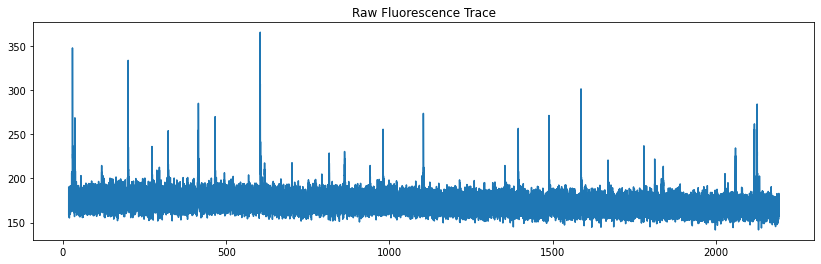

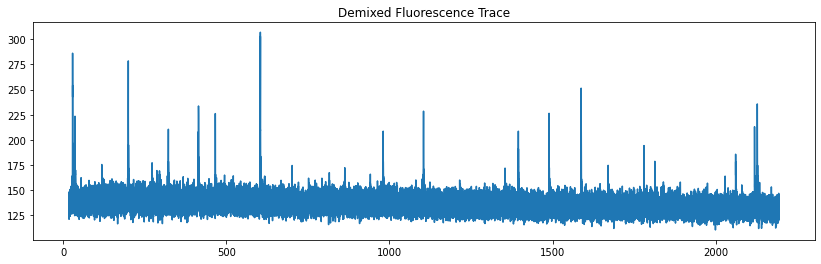

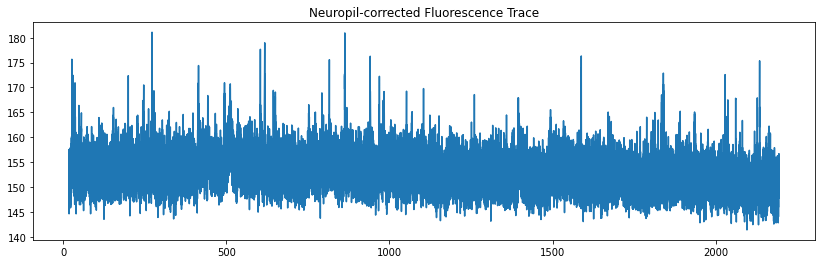

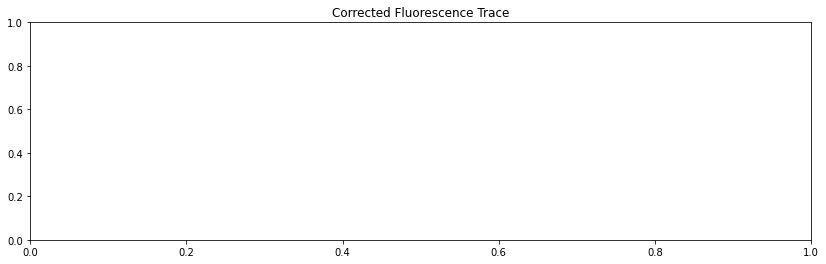

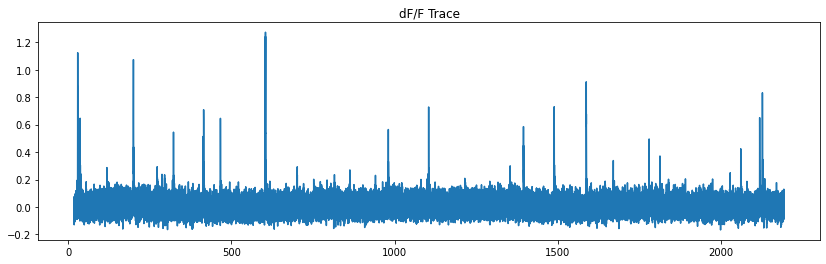

In [7]:
selected_cell_id = np.random.choice(data_set.get_cell_specimen_ids(), size=1)[0]

time, raw_traces = data_set.get_fluorescence_traces(cell_specimen_ids=[selected_cell_id])
plt.figure(figsize=(14,4))
plt.title("Raw Fluorescence Trace")
plt.plot(time, raw_traces[0])

_, demixed_traces = data_set.get_demixed_traces(cell_specimen_ids=[selected_cell_id])
plt.figure(figsize=(14,4))
plt.title("Demixed Fluorescence Trace")
plt.plot(time, demixed_traces[0])

_, neuropil_traces = data_set.get_neuropil_traces(cell_specimen_ids=[selected_cell_id])
plt.figure(figsize=(14,4))
plt.title("Neuropil-corrected Fluorescence Trace")
plt.plot(time, neuropil_traces[0])

#_, corrected_traces = data_set.get_corrected_fluorescence_traces(cell_specimen_ids=[selected_cell_id])
plt.figure(figsize=(14,4))
plt.title("Corrected Fluorescence Trace")
# plt.plot(time[1:], corrected_traces[0])


_, dff_traces = data_set.get_dff_traces(cell_specimen_ids=[selected_cell_id])
plt.figure(figsize=(14,4))
plt.title("dF/F Trace")
plt.plot(time, dff_traces[0])

### ROI Masks

Text(0.5, 1.0, 'max projection')

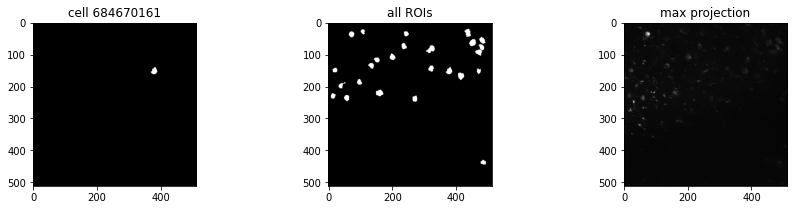

In [8]:
cell_ids = data_set.get_cell_specimen_ids()
rand_cell_ids = np.random.choice(cell_ids, size=1)

# Individual ROIs
f, axes = plt.subplots(1, len(rand_cell_ids) + 2, figsize=(15, 3))
for i, cell_id in enumerate(rand_cell_ids):
    roi_mask = data_set.get_roi_mask(cell_specimen_ids=[cell_id])[0]
    axes[i].imshow(roi_mask.get_mask_plane(), cmap='gray')
    axes[i].set_title('cell %d' % cell_id)

# All ROI masks
all_roi_masks = data_set.get_roi_mask_array()
combined_mask = all_roi_masks.max(axis=0)
axes[-2].imshow(combined_mask, cmap='gray')
axes[-2].set_title('all ROIs')

# Max projection
max_projection = data_set.get_max_projection()
axes[-1].imshow(max_projection, cmap='gray')
axes[-1].set_title('max projection')

## Running Speed

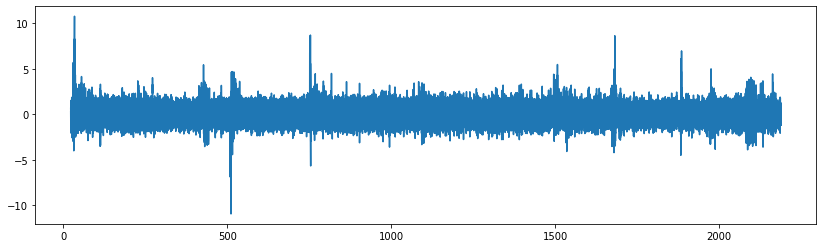

In [9]:
dxcm, dxtime = data_set.get_running_speed()
plt.figure(figsize=(14,4))
plt.plot(dxtime, dxcm)
plt.show()

## Motion Correction

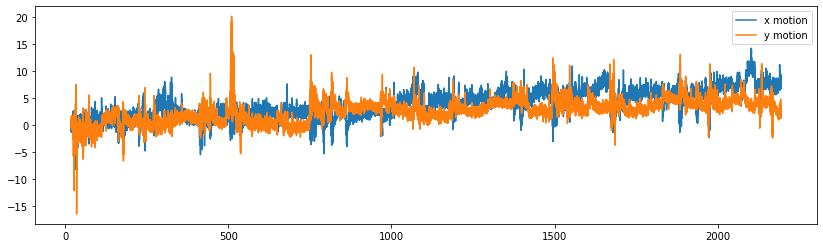

In [10]:
mc = data_set.get_motion_correction()

plt.figure(figsize=(14,4))
plt.plot(mc.timestamp, mc.x_motion)
plt.plot(mc.timestamp, mc.y_motion)
plt.legend(['x motion','y motion'])
plt.show()

## Eye Tracking

Still trying to figure out how parse out the __pupil_size__ and __pupil_location__ from the lims pipeline. I have a feeling the _EyeDlcScreenMapping_ h5 file likely contains this data - but it's not clear or well-documented how the data is being stored and if any post-processing needs to be done.

## L0 Events

In [11]:
data_set.get_units_table()

,pos_x,pos_y
cell_specimen_id,,
684670226,109,30
684670214,436,30
684670222,244,36
684670224,73,38
684670145,438,39
684670139,481,57
684670228,451,64
684670204,237,75
684670202,479,78


Text(0.5, 1.0, 'Cell 684670183 DF/F events')

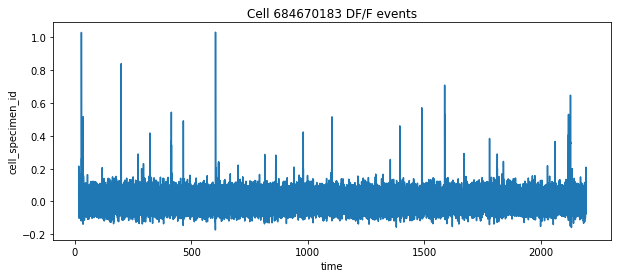

In [12]:
plt.figure(figsize=(10, 4))
times, dff_events = data_set.get_l0_dff_events(cell_specimen_ids=[selected_cell_id])

plt.plot(times, dff_events[0])
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('time')
plt.ylabel('cell_specimen_id')
plt.title('Cell {} DF/F events'.format(selected_cell_id))

Text(0.5, 1.0, 'Cell 684670183 True/False events')

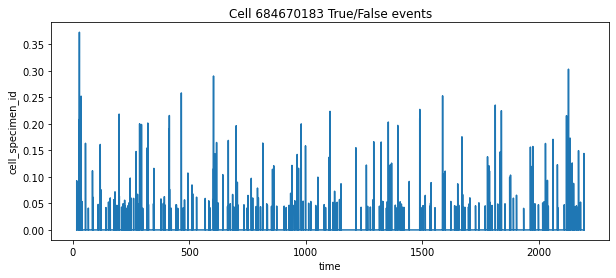

In [13]:
plt.figure(figsize=(10, 4))
times, tf_events = data_set.get_l0_true_false_events(cell_specimen_ids=[selected_cell_id])

plt.plot(times, tf_events[0])
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('time')
plt.ylabel('cell_specimen_id')
plt.title('Cell {} True/False events'.format(selected_cell_id))